# Trabalho 01 

Descrição: Será utilizado o inventário de emissões atmosféricas do estado do Paraná, de fontes fixas por município em taxa anual, do Sistema de Emissões Atmosféricas do estado. Os dados são dos anos de 2023 e 2024 e o parâmetro é o NOX.

Requisitos:
- Operação com dados - leitura e manipulação
- Estatística univariada
- Estatística bivariada

## Importando os pacotes:

In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt

files = os.listdir(r"C:\Users\sbswi\Documents\GitHub\python_env_app\dados\trabalho1")
files = [fname for fname in files if fname.endswith('.csv')]
files

['Relatorio_Inventario_Completo_NOx_2023.csv',
 'Relatorio_Inventario_Completo_NOx_2024.csv']

### Encontrando os documentos:

In [87]:
caminho_salvar = r'C:\Users\sbswi\Documents\GitHub\python_env_app\outputs\slides'
dfs = []
#loop em cada arquivo e adiciona na lista para conseguir analisar os dois Dataframes
for file in files:
    print(file)
    df = pd.read_csv(r'C:\Users\sbswi\Documents\GitHub\python_env_app\dados\trabalho1'+'/'+file) # leitura dos arquivos
    dfs.append(df) # adiciona o arquivo na lista
df_group = pd.concat(dfs,ignore_index= True) # concatena - cria uma tabela nova com as informações das duas tabelas
df_group.head()

Relatorio_Inventario_Completo_NOx_2023.csv
Relatorio_Inventario_Completo_NOx_2024.csv


,Atividade,Atividade Específica,Município,Ano da Declaração,Órgão Emissor,Ponto de Emissão,Descrição Ponto de Emissão,Latitude,Longitude,Origem Emissão,Equipamento,Parâmetro,Combustível,VBS,Taxa ton/ano,Média taxa ton/ano
0,Alimentos,Indústria de farinha de mandioca,Cianorte,2023,IAT,Chaminé,"Chaminé 1 - altura 16,50m / diâmetro 0,65m",-23.665160,-52.712721,Combustão utilizando mais de um tipo de combustível,Caldeira - caldeira mista horizontal nº de série 0479 (farinheira),NOx,Outros Gases (sem ser GN ou GLP),3256,"0,63340",0.63340
1,Alimentos,Indústria de farinha de mandioca,Cianorte,2023,IAT,Chaminé,"Chaminé 2 - altura 12,00m / diâmetro 0,65m",-23.665160,-52.712721,Combustão utilizando mais de um tipo de combustível,Caldeira - caldeira flamotubular horizontal nº de série 0214 (fecularia,NOx,Outros Gases (sem ser GN ou GLP),4250,"0,18955",0.18955
2,Alimentos,Indústria de biscoitos e bolachas; Fabricação de produtos de padaria e confeitaria com predominância de produção própria; Fabricação de derivados do cacau e de chocolates,Guarapuava,2023,IAT,Chaminé,"Chaminé 2 - altura 6,00m / diâmetro 0,15m",-25.353374,-51.455684,Combustão não externa de Gas Natural ou GLP,Forno - forno com câmara de aquecimento da marca marcepan,NOx,Gás GLP,1096,"0,01664",0.01799
3,Alimentos,Indústria de biscoitos e bolachas; Fabricação de produtos de padaria e confeitaria com predominância de produção própria; Fabricação de derivados do cacau e de chocolates,Guarapuava,2023,IAT,Chaminé,"Chaminé 2 - altura 6,00m / diâmetro 0,15m",-25.353374,-51.455684,Combustão não externa de Gas Natural ou GLP,Forno - forno com câmara de aquecimento da marca marcepan,NOx,Gás GLP,633,"0,01934",NaN
4,Alimentos,Indústria de biscoitos e bolachas; Fabricação de produtos de padaria e confeitaria com predominância de produção própria; Fabricação de derivados do cacau e de chocolates,Guarapuava,2023,IAT,Chaminé,"Chaminé 1 - altura 6,00m / diâmetro 0,20m",-25.353373,-51.455715,Combustão não externa de Gas Natural ou GLP,Forno - forno modelo gas x3/m marca f.b.r,NOx,Gás GLP,1628,"0,07187",0.07851


In [88]:
#Salvar o dataframe como imagem
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 3))  # ajuste o tamanho conforme o DataFrame
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df_group.head(10).values, colLabels=df_group.columns, loc='center')

plt.savefig(caminho_salvar, bbox_inches='tight')
plt.close()

In [89]:
df_group['Ano da Declaração'].unique() # confirmando  que os dois anos estão na tabela

array([2023, 2024])

### Arrumando leitura da taxa TON/ANO:

In [90]:
def remover_virgulas_quantidade(df_group):
    df_group['Taxa ton/ano'] = (df_group['Taxa ton/ano'].astype(str).str.replace(',', '.', regex=False).astype(float)) # o regex substitui o texto literal
remover_virgulas_quantidade(df_group)
df_group

,Atividade,Atividade Específica,Município,Ano da Declaração,Órgão Emissor,Ponto de Emissão,Descrição Ponto de Emissão,Latitude,Longitude,Origem Emissão,Equipamento,Parâmetro,Combustível,VBS,Taxa ton/ano,Média taxa ton/ano
0,Alimentos,Indústria de farinha de mandioca,Cianorte,2023,IAT,Chaminé,"Chaminé 1 - altura 16,50m / diâmetro 0,65m",-23.665160,-52.712721,Combustão utilizando mais de um tipo de combustível,Caldeira - caldeira mista horizontal nº de série 0479 (farinheira),NOx,Outros Gases (sem ser GN ou GLP),3256,0.63340,0.63340
1,Alimentos,Indústria de farinha de mandioca,Cianorte,2023,IAT,Chaminé,"Chaminé 2 - altura 12,00m / diâmetro 0,65m",-23.665160,-52.712721,Combustão utilizando mais de um tipo de combustível,Caldeira - caldeira flamotubular horizontal nº de série 0214 (fecularia,NOx,Outros Gases (sem ser GN ou GLP),4250,0.18955,0.18955
2,Alimentos,Indústria de biscoitos e bolachas; Fabricação de produtos de padaria e confeitaria com predominância de produção própria; Fabricação de derivados do cacau e de chocolates,Guarapuava,2023,IAT,Chaminé,"Chaminé 2 - altura 6,00m / diâmetro 0,15m",-25.353374,-51.455684,Combustão não externa de Gas Natural ou GLP,Forno - forno com câmara de aquecimento da marca marcepan,NOx,Gás GLP,1096,0.01664,0.01799
3,Alimentos,Indústria de biscoitos e bolachas; Fabricação de produtos de padaria e confeitaria com predominância de produção própria; Fabricação de derivados do cacau e de chocolates,Guarapuava,2023,IAT,Chaminé,"Chaminé 2 - altura 6,00m / diâmetro 0,15m",-25.353374,-51.455684,Combustão não externa de Gas Natural ou GLP,Forno - forno com câmara de aquecimento da marca marcepan,NOx,Gás GLP,633,0.01934,NaN
4,Alimentos,Indústria de biscoitos e bolachas; Fabricação de produtos de padaria e confeitaria com predominância de produção própria; Fabricação de derivados do cacau e de chocolates,Guarapuava,2023,IAT,Chaminé,"Chaminé 1 - altura 6,00m / diâmetro 0,20m",-25.353373,-51.455715,Combustão não externa de Gas Natural ou GLP,Forno - forno modelo gas x3/m marca f.b.r,NOx,Gás GLP,1628,0.07187,0.07851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,Ind. de papel e celulose,NaN,Telêmaco Borba,2024,IAT,Chaminé,"Chaminé 6 - altura 64,00m / diâmetro 1,30m",-24.314345,-50.613713,Indústria de Celulose - Fornos de Cal em Indústrias de Celulose.,NaN,NOx,Óleo Combustível,20271,6.46097,NaN
2102,"Ind. têxtil, de vestuário, calçados e artefatos de tecidos",NaN,Ponta Grossa,2024,IAT,Chaminé,"Chaminé 1 - altura 11,50m / diâmetro 0,82m",-25.143210,-50.152867,Combustão externa de Derivados de Madeira,NaN,NOx,Biomassa,8053,0.62713,0.62713
2103,Ind. química,NaN,Ponta Grossa,2024,IAT,Chaminé,"Chaminé 1 - altura 6,50m / diâmetro 0,37m",-25.146268,-50.145185,Combustão externa de Gas Natural ou GLP,NaN,NOx,Gás Natural,2687,1.83554,1.71123
2104,Ind. química,NaN,Ponta Grossa,2024,IAT,Chaminé,"Chaminé 1 - altura 6,50m / diâmetro 0,37m",-25.146268,-50.145185,Combustão externa de Gas Natural ou GLP,NaN,NOx,Gás Natural,5826,1.58692,NaN


In [91]:
# Confirmando o Dtypes 
df_group.dtypes

Atividade                      object
Atividade Específica           object
Município                      object
Ano da Declaração               int64
Órgão Emissor                  object
Ponto de Emissão               object
Descrição Ponto de Emissão     object
Latitude                      float64
Longitude                     float64
Origem Emissão                 object
Equipamento                    object
Parâmetro                      object
Combustível                    object
VBS                             int64
Taxa ton/ano                  float64
Média taxa ton/ano            float64
dtype: object

In [92]:
#garantindo que serão ignorados os erros - não numericos 
df_group["Taxa ton/ano"] = pd.to_numeric(df_group["Taxa ton/ano"], errors = 'coerce')
df_group.head()

,Atividade,Atividade Específica,Município,Ano da Declaração,Órgão Emissor,Ponto de Emissão,Descrição Ponto de Emissão,Latitude,Longitude,Origem Emissão,Equipamento,Parâmetro,Combustível,VBS,Taxa ton/ano,Média taxa ton/ano
0,Alimentos,Indústria de farinha de mandioca,Cianorte,2023,IAT,Chaminé,"Chaminé 1 - altura 16,50m / diâmetro 0,65m",-23.665160,-52.712721,Combustão utilizando mais de um tipo de combustível,Caldeira - caldeira mista horizontal nº de série 0479 (farinheira),NOx,Outros Gases (sem ser GN ou GLP),3256,0.63340,0.63340
1,Alimentos,Indústria de farinha de mandioca,Cianorte,2023,IAT,Chaminé,"Chaminé 2 - altura 12,00m / diâmetro 0,65m",-23.665160,-52.712721,Combustão utilizando mais de um tipo de combustível,Caldeira - caldeira flamotubular horizontal nº de série 0214 (fecularia,NOx,Outros Gases (sem ser GN ou GLP),4250,0.18955,0.18955
2,Alimentos,Indústria de biscoitos e bolachas; Fabricação de produtos de padaria e confeitaria com predominância de produção própria; Fabricação de derivados do cacau e de chocolates,Guarapuava,2023,IAT,Chaminé,"Chaminé 2 - altura 6,00m / diâmetro 0,15m",-25.353374,-51.455684,Combustão não externa de Gas Natural ou GLP,Forno - forno com câmara de aquecimento da marca marcepan,NOx,Gás GLP,1096,0.01664,0.01799
3,Alimentos,Indústria de biscoitos e bolachas; Fabricação de produtos de padaria e confeitaria com predominância de produção própria; Fabricação de derivados do cacau e de chocolates,Guarapuava,2023,IAT,Chaminé,"Chaminé 2 - altura 6,00m / diâmetro 0,15m",-25.353374,-51.455684,Combustão não externa de Gas Natural ou GLP,Forno - forno com câmara de aquecimento da marca marcepan,NOx,Gás GLP,633,0.01934,NaN
4,Alimentos,Indústria de biscoitos e bolachas; Fabricação de produtos de padaria e confeitaria com predominância de produção própria; Fabricação de derivados do cacau e de chocolates,Guarapuava,2023,IAT,Chaminé,"Chaminé 1 - altura 6,00m / diâmetro 0,20m",-25.353373,-51.455715,Combustão não externa de Gas Natural ou GLP,Forno - forno modelo gas x3/m marca f.b.r,NOx,Gás GLP,1628,0.07187,0.07851


## Verificando os outliers de cada setor: 

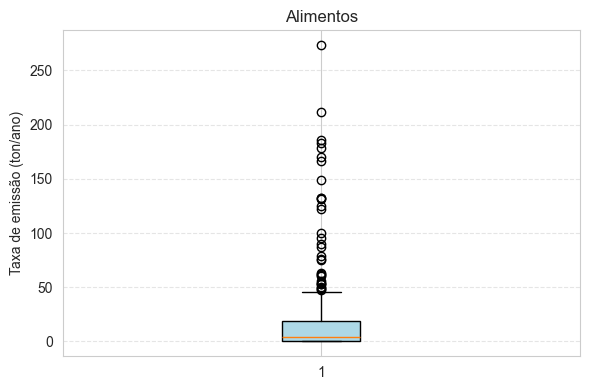

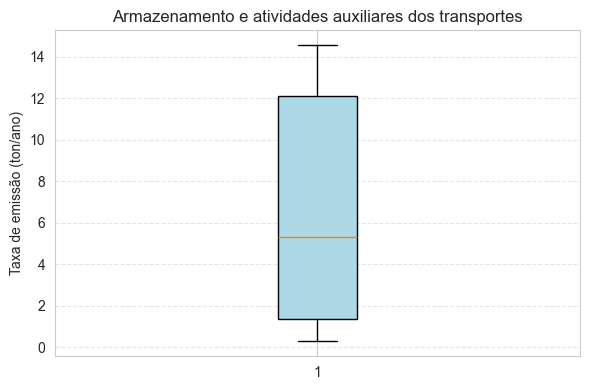

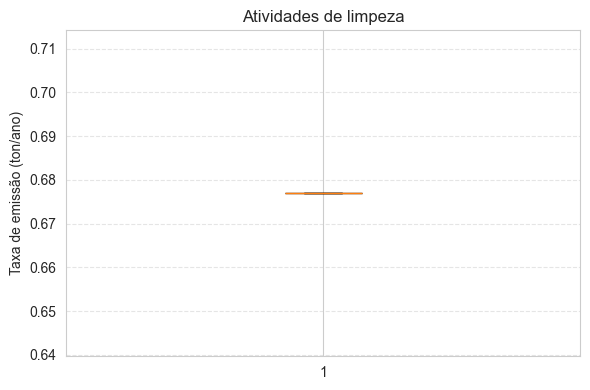

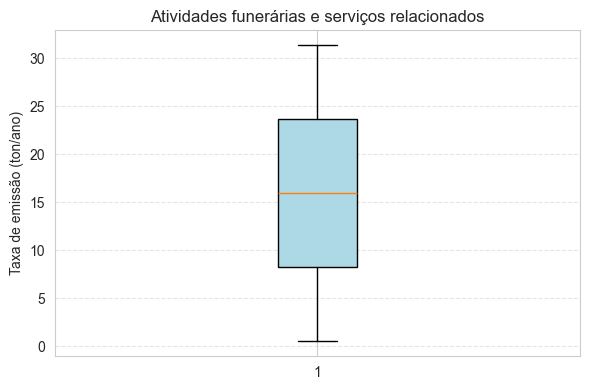

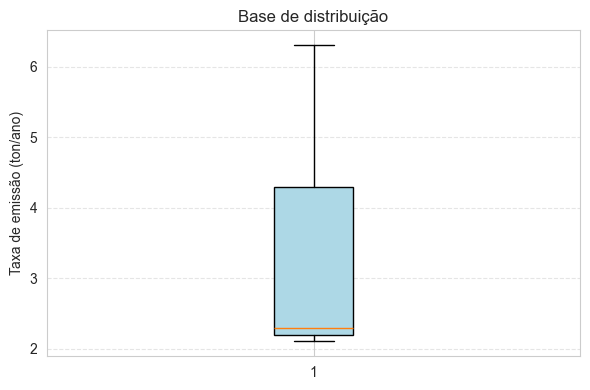

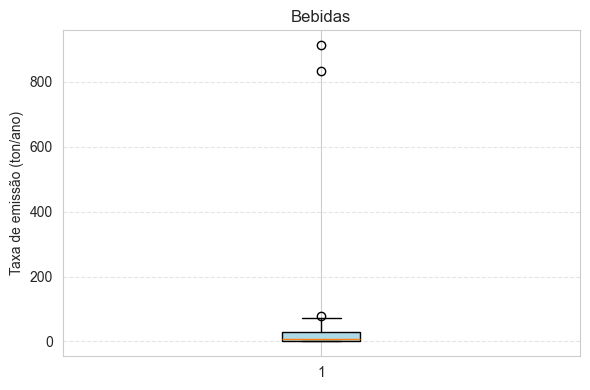

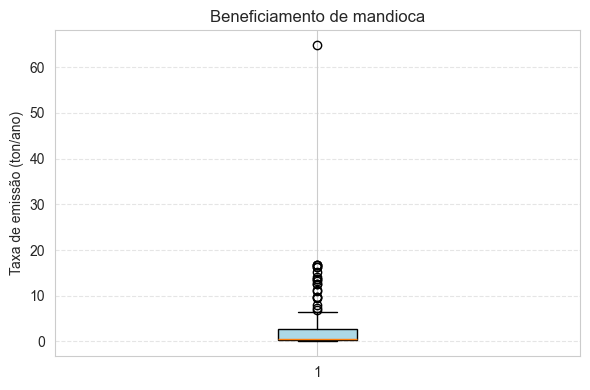

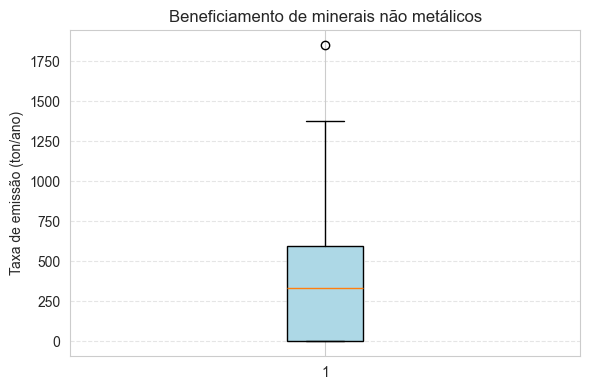

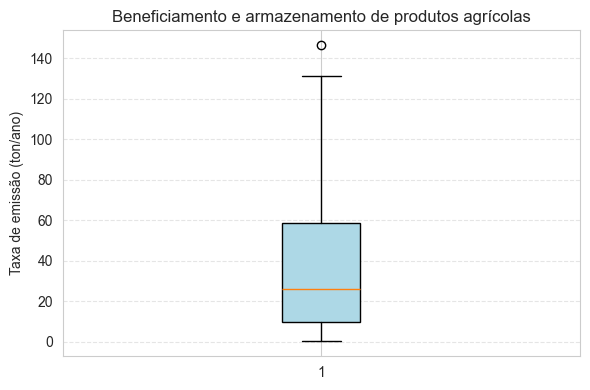

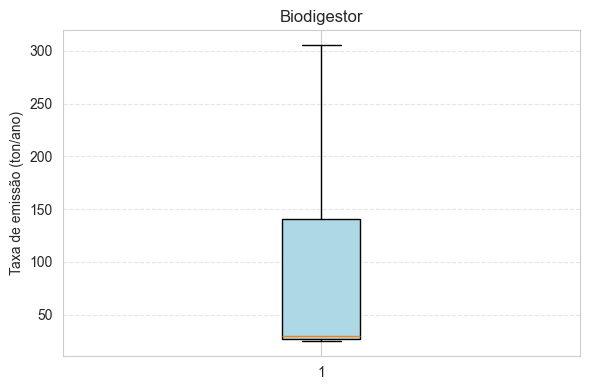

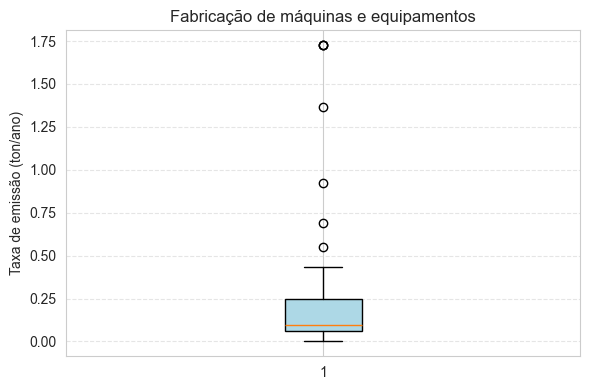

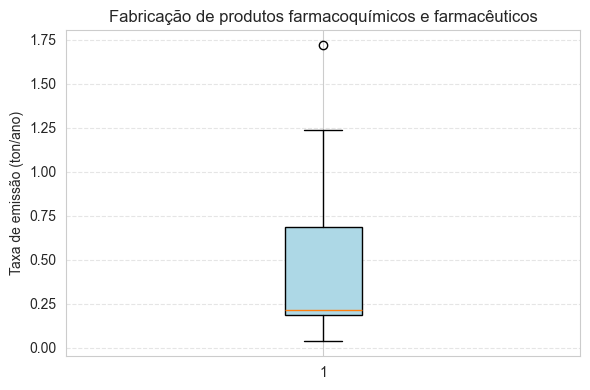

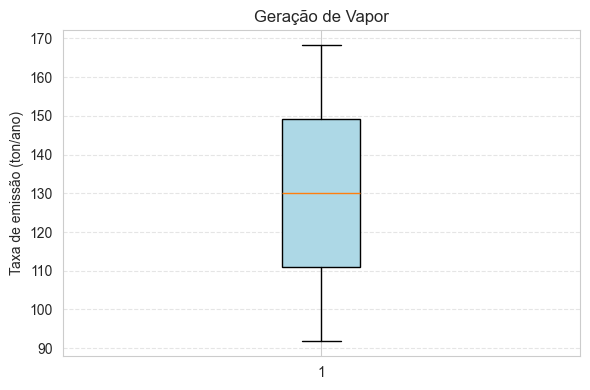

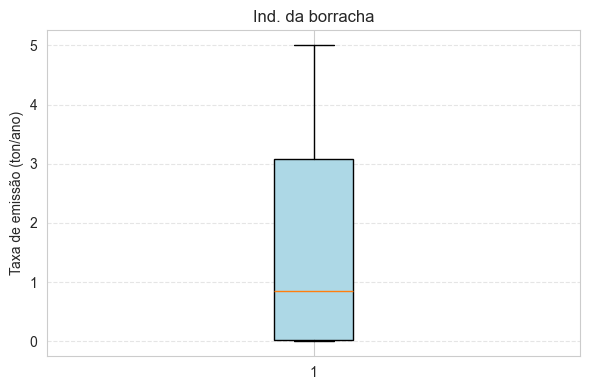

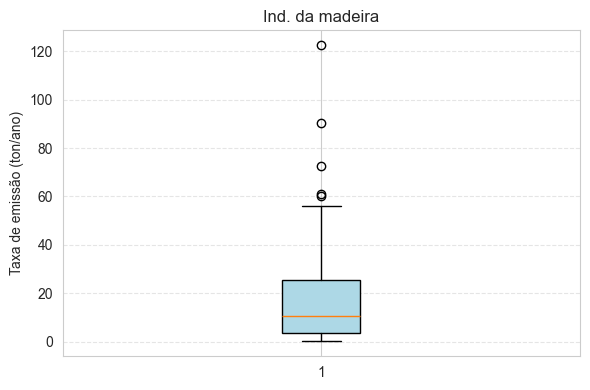

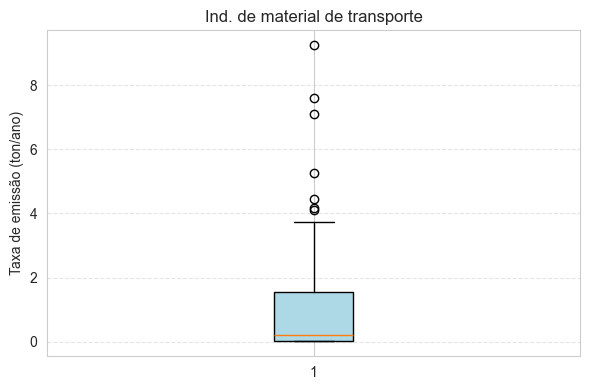

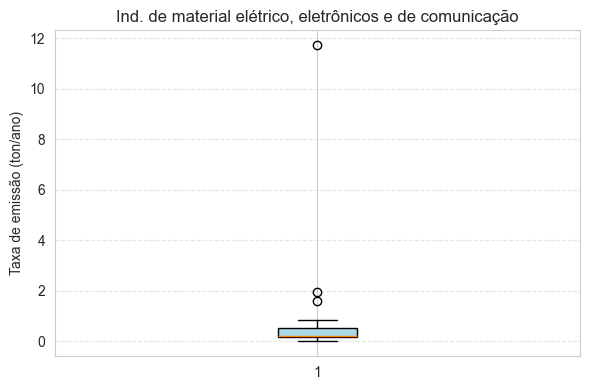

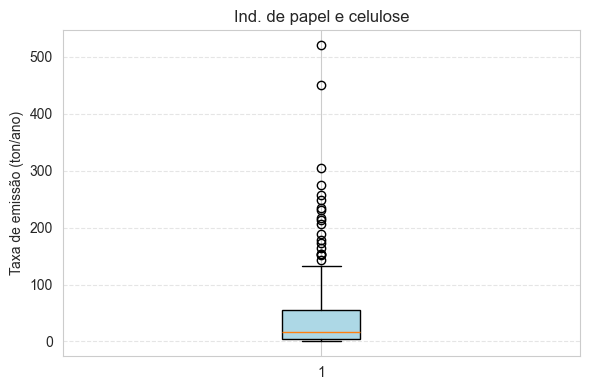

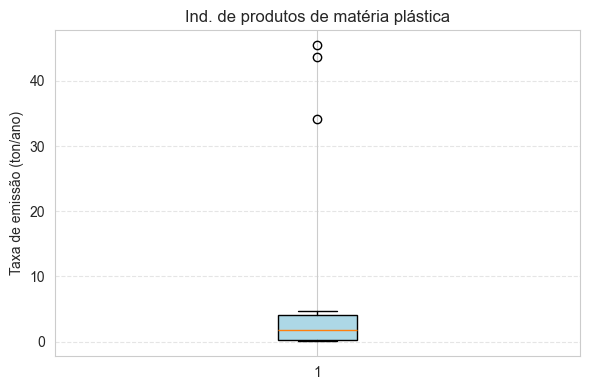

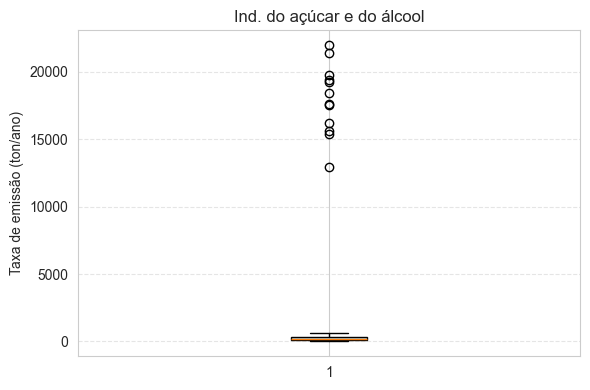

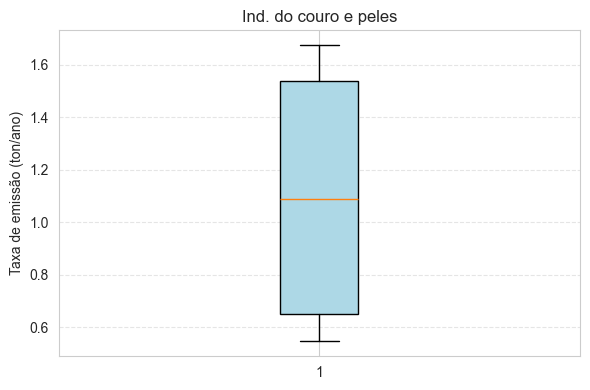

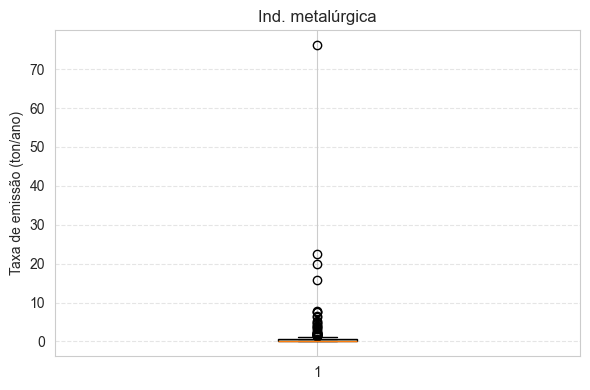

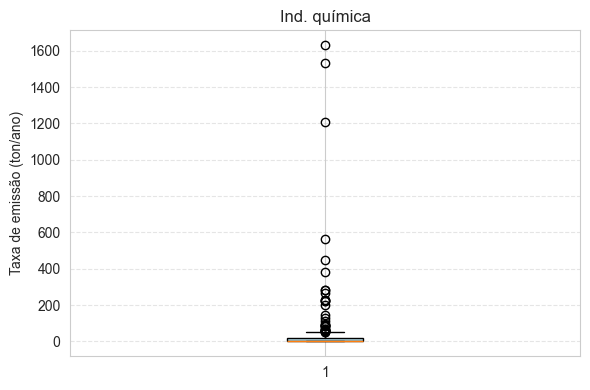

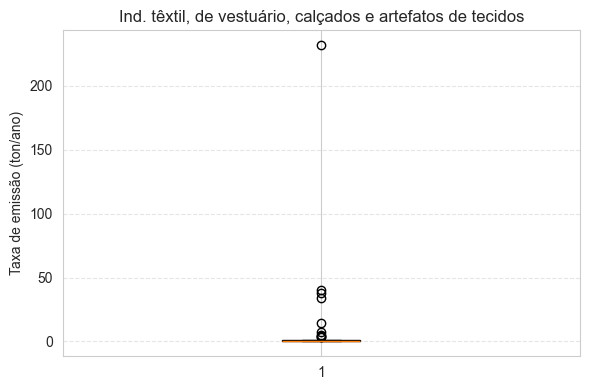

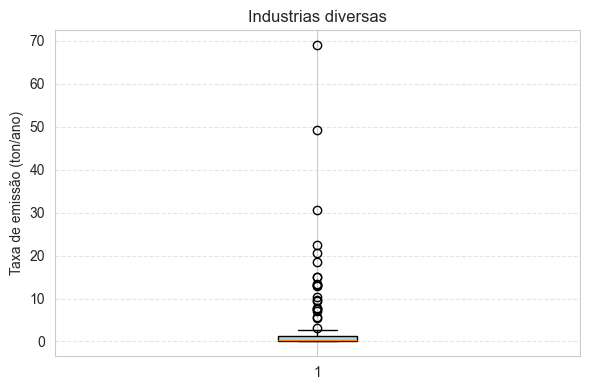

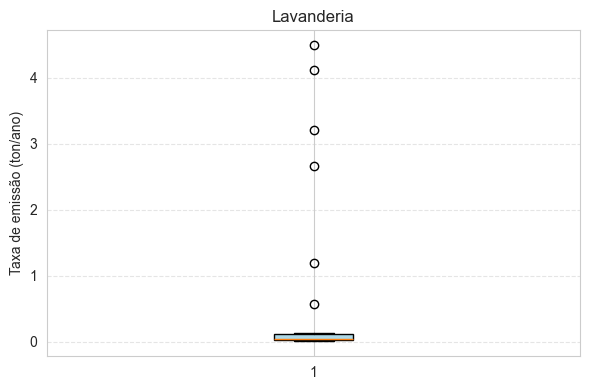

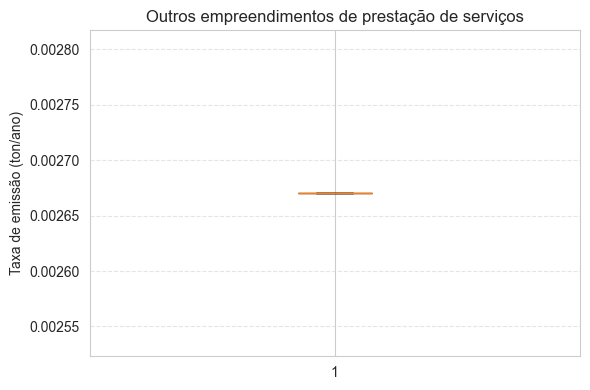

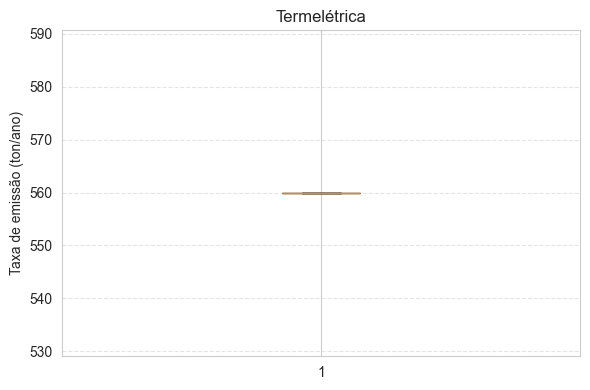

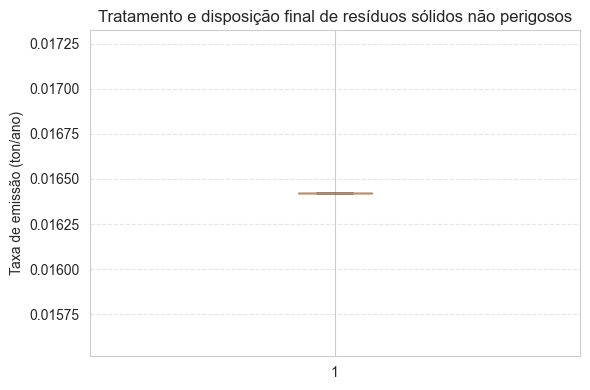

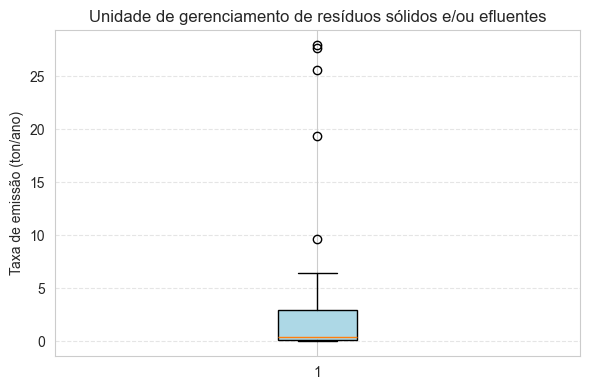

In [94]:
df_plot = df_group[['Atividade', 'Taxa ton/ano']].dropna()

# Gera um gráfico separado para cada setor
for setor, dados in df_plot.groupby('Atividade'):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.boxplot(dados['Taxa ton/ano'], vert=True, patch_artist=True, boxprops=dict(facecolor='lightblue'))
    
    ax.set_title(setor)
    ax.set_ylabel('Taxa de emissão (ton/ano)')
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

## Removendo os outliers de percentil 99.5

In [ ]:
import numpy as np

df_sem_outlier = df_group.copy()

# Remove outliers dentro de cada setor (Atividade)
for setor in df_sem_outlier['Atividade'].unique():
    limite = np.nanpercentile(df_sem_outlier.loc[df_sem_outlier['Atividade'] == setor, 'Taxa ton/ano'],99.5)
    df_sem_outlier.loc[(df_sem_outlier['Atividade'] == setor) & (df_sem_outlier['Taxa ton/ano'] > limite),'Taxa ton/ano'] = np.nan
df_sem_outlier

## Comparando com outlier vs sem outlier:

In [ ]:
atividade_describe = df_group.groupby('Atividade')['Taxa ton/ano'].describe()
atividade_describe

In [ ]:
atividade_describe_sem_outlier = df_sem_outlier.groupby('Atividade')['Taxa ton/ano'].describe()
atividade_describe_sem_outlier 

## Comparando as médias por setor:

In [ ]:
atividade_taxa = (df_sem_outlier.groupby('Atividade',as_index = False )['Taxa ton/ano'])
atividade_media = atividade_taxa.mean().sort_values('Taxa ton/ano')
atividade_media

# Plote 2 - Média de emissão por setor: 

In [ ]:
fig, ax = plt.subplots(figsize =(10,6))
ax.barh(atividade_media['Atividade'],atividade_media['Taxa ton/ano'], color = 'b')
fig.tight_layout()
ax.set_xlabel("Emissão ton/ano")
ax.set_ylabel("Setores")
ax.set_title(" Média - Setores por Emissão(Ton/Ano)")

#aumentando a visualização - 1
atividade_filtrada = atividade_media[atividade_media['Taxa ton/ano']<250]
fig, ax = plt.subplots(figsize =(10,6))
ax.barh(atividade_filtrada['Atividade'],atividade_filtrada['Taxa ton/ano'], color = '#6699FF')
fig.tight_layout()
ax.set_xlabel("Emissão ton/ano")
ax.set_ylabel("Setores")
ax.set_title(" Média - Setores por Emissão(Ton/Ano) < 250")

#aumentando a visualização - 2 
atividade_filtrada = atividade_media[atividade_media['Taxa ton/ano']<100]
fig, ax = plt.subplots(figsize =(10,6))
ax.barh(atividade_filtrada['Atividade'],atividade_filtrada['Taxa ton/ano'], color = '#99CCFF')
fig.tight_layout()
ax.set_xlabel("Emissão ton/ano")
ax.set_ylabel("Setores")
ax.set_title(" Média - Setores por Emissão(Ton/Ano) < 100")

# Plote 3 - Percentil médio(mediana) emissão por setores:

In [ ]:
atividade_mediana = atividade_taxa.median().sort_values('Taxa ton/ano')
atividade_mediana

In [ ]:
fig, ax = plt.subplots(figsize =(10,6))
ax.barh(atividade_mediana['Atividade'],atividade_mediana['Taxa ton/ano'], color = 'orange')
fig.tight_layout()
ax.set_xlabel("Emissão ton/ano")
ax.set_ylabel("Setores")
ax.set_title(" Percentil Médio - Setores por Emissão(Ton/Ano)")

## Comparação - Emissão nos anos de 2023 e 2024

In [ ]:
# Agrupa pelos valores da coluna 'Ano da Declaração'
df_anos = df_sem_outlier.groupby("Ano da Declaração")["Taxa ton/ano"].sum().reset_index()

# Cria o gráfico de barras comparando os anos
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(df_anos["Ano da Declaração"], df_anos["Taxa ton/ano"], color=['green', 'purple'])

# Personalizações
ax.set_xlabel("Ano da Declaração")
ax.set_ylabel("Emissão (ton)")
ax.set_xticks(df_anos["Ano da Declaração"])
ax.set_title("Comparação - Emissão nos anos de 2023 e 2024")

# Média por atividade em cada ano - 2023 e 2024 

In [ ]:
media_ano_atividade = (df_sem_outlier.groupby(['Ano da Declaração', 'Atividade'], as_index=False)['Taxa ton/ano'].median().rename(columns={'Taxa ton/ano': 'Emissão média (ton/ano)'}))

# Tabela comparativa lado a lado (todas as atividades)
# pivot(Atividade vira índice, coluna separada pra cada ano, conteúdo das células é a emissão média
comparativo = (media_ano_atividade.pivot(index='Atividade', columns='Ano da Declaração', values='Emissão média (ton/ano)').fillna(0)) # NaN = 0 

# Gráfico com todas as atividades
fig, ax = plt.subplots(figsize=(12, 6))
comparativo.plot(kind='bar', ax=ax)
ax.set_xlabel('Atividade')
ax.set_ylabel('Emissão (ton/ano)')
ax.legend(title='Ano da Declaração')

In [ ]:
df_municipio = (df_sem_outlier.groupby('Município', as_index=False)['Taxa ton/ano'].sum().sort_values(by='Taxa ton/ano', ascending=False))
top10 = df_municipio.head()  # mostra só os 10 maiores

top10 = df_municipio.head(10)  # mostra só os 10 maiores

fig, ax = plt.subplots(figsize=(8, 5))
barras = ax.barh(top10['Município'], top10['Taxa ton/ano'], color='steelblue')
ax.bar_label(barras, fmt='%.0f')
ax.invert_yaxis()  # coloca o maior em cima
ax.set_xlabel('Emissão total (ton/ano)')
ax.set_title('Top 10 municípios com maiores emissões')
plt.tight_layout()

In [ ]:
# Calcula a mediana da emissão por ano e atividade
media_ano_atividade = (
    df_sem_outlier.groupby(['Ano da Declaração', 'Atividade'], as_index=False)['Taxa ton/ano'].median()
)

for setor, dados in media_ano_atividade.groupby('Atividade'):
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.bar(dados['Ano da Declaração'].astype(str),dados['Taxa ton/ano'],color=['#6baed6', '#fd8d3c'],width=0.6)

    ax.set_title(setor)
    ax.set_xlabel('Ano da Declaração')
    ax.set_ylabel('Taxa ton/ano')
    ax.grid(True, axis='y', linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.show()

# Emissão por ponto de emissão/ano
Nesse caso só temos chaminé como ponto de emissão

In [ ]:
df_sem_outlier['Ponto de Emissão'].unique()

In [ ]:
emissao_ponto_por_atividade = (df_sem_outlier.groupby(['Atividade', 'Ponto de Emissão'], as_index=False)['Taxa ton/ano'].median().rename(columns={'Taxa ton/ano': 'Emissão mediana (ton/ano)'}))

tabela_atividade = (emissao_ponto_por_atividade.pivot(index='Atividade', columns='Ponto de Emissão', values='Emissão mediana (ton/ano)').fillna(0))

tabela_atividade = tabela_atividade.sort_values(by=tabela_atividade.columns[0], ascending=False)

# GRÁFICO — BARRAS LADO A LADO 
fig, ax = plt.subplots(figsize=(10, 8))
tabela_atividade.plot(kind='barh', ax=ax)
ax.set_xlabel('Emissão (ton/ano)')
ax.set_ylabel('Atividade')
ax.legend(title='Ponto de Emissão')
plt.tight_layout()

# Relação - Emissão de cada setor e altura da chaminé

In [ ]:
#Quebra o texto da coluna Descrição Ponto de Emissão
df_sem_outlier[['Chaminé', 'Altura (m)', 'Diâmetro (m)']] = df_sem_outlier['Descrição Ponto de Emissão'].str.extract(
    r'Chaminé\s*(\d+)\s*-\s*altura\s*([\d,]+)m\s*/\s*diâmetro\s*([\d,]+)m',expand=True)

# Substitui vírgulas por pontos e converte para float
df_sem_outlier['Altura (m)'] = df_sem_outlier['Altura (m)'].str.replace(',', '.').astype(float)
df_sem_outlier['Diâmetro (m)'] = df_sem_outlier['Diâmetro (m)'].str.replace(',', '.').astype(float)


df_chamine = df_sem_outlier[['Descrição Ponto de Emissão', 'Chaminé', 'Altura (m)', 'Diâmetro (m)']]
df_chamine

In [ ]:
#confirmando dtypes:
print(df_chamine.dtypes)

### Plote 1 - Análise Geral

In [ ]:
fig, ax = plt.subplots(figsize =(10,6))
ax.scatter(df_chamine['Altura (m)'],df_group['Taxa ton/ano'], color = 'r')
fig.tight_layout()
ax.set_xlabel("Altura (m)")
ax.set_ylabel("Emissões ton/ano")
ax.set_title("Relação da Altura da Chaminé/Emissão")
ax.grid(True)

## Plote 2 - taxa de emissão - por setor - em relação a altura da chaminé

In [ ]:
# Junta os dados
df_plot = pd.merge(
    df_group[['Atividade', 'Taxa ton/ano', 'Descrição Ponto de Emissão']],
    df_chamine[['Descrição Ponto de Emissão', 'Altura (m)']],
    on='Descrição Ponto de Emissão',
    how='inner'
).dropna()

# Um gráfico por setor
for setor, dados in df_plot.groupby('Atividade'):
    plt.scatter(dados['Altura (m)'], dados['Taxa ton/ano'], color='red')
    plt.title(setor)
    plt.xlabel('Altura (m)')
    plt.ylabel('Taxa ton/ano')
    plt.grid(True)
    plt.show()